# Load necessary library

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the preprocessed data 

In [3]:
with open(r"C:\Users\VY\Documents\data_preprocess.csv") as f: 
    df = pd.read_csv(f)

df.head()

,Unnamed: 0,X,gwb_code_10,regio,gm_naam,recs,ind_wbi,Number.of.inhabitants,Number.of.man,Number.of.women,...,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114
0,2,2,340101,Centrum Almere Haven,Almere,Buurt,3,1580,740,845,...,0.0,1.0,3.9,2.7,0.4,2.4,4.0,7.0,50.0,4.6
1,3,3,340102,De Werven,Almere,Buurt,3,2860,1375,1480,...,0.0,1.0,3.0,2.6,1.2,2.3,4.0,6.6,49.6,4.4
2,4,4,340103,De Hoven,Almere,Buurt,3,2410,1170,1240,...,0.2,1.0,3.2,2.2,0.8,1.9,4.0,7.0,50.0,4.2
3,5,5,340104,De Meenten,Almere,Buurt,3,2260,1100,1160,...,0.0,1.0,3.0,3.2,1.7,2.8,4.0,6.4,49.0,4.8
4,6,6,340105,De Grienden,Almere,Buurt,3,2255,1060,1195,...,0.0,1.0,3.0,2.9,2.2,2.3,4.0,6.0,48.0,4.3


In [4]:
# Get rid of the first two columns 
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

df.head()

,gwb_code_10,regio,gm_naam,recs,ind_wbi,Number.of.inhabitants,Number.of.man,Number.of.women,Numbers.of.people.from.0.14.years.old,Number.of.people.from.15.24.years.old,...,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114
0,340101,Centrum Almere Haven,Almere,Buurt,3,1580,740,845,155,150,...,0.0,1.0,3.9,2.7,0.4,2.4,4.0,7.0,50.0,4.6
1,340102,De Werven,Almere,Buurt,3,2860,1375,1480,515,290,...,0.0,1.0,3.0,2.6,1.2,2.3,4.0,6.6,49.6,4.4
2,340103,De Hoven,Almere,Buurt,3,2410,1170,1240,450,295,...,0.2,1.0,3.2,2.2,0.8,1.9,4.0,7.0,50.0,4.2
3,340104,De Meenten,Almere,Buurt,3,2260,1100,1160,380,215,...,0.0,1.0,3.0,3.2,1.7,2.8,4.0,6.4,49.0,4.8
4,340105,De Grienden,Almere,Buurt,3,2255,1060,1195,370,220,...,0.0,1.0,3.0,2.9,2.2,2.3,4.0,6.0,48.0,4.3


In [6]:
df.shape

(624, 143)

# Drop the columns nationality columns 

In [10]:
df = df.drop(df.columns[13:18], axis=1)
df.head()

,gwb_code_10,regio,gm_naam,recs,ind_wbi,Number.of.inhabitants,Number.of.man,Number.of.women,Numbers.of.people.from.0.14.years.old,Number.of.people.from.15.24.years.old,...,Within5Km_105,Within10Km_106,Within20Km_107,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114
0,340101,Centrum Almere Haven,Almere,Buurt,3,1580,740,845,155,150,...,0.0,1.0,3.9,2.7,0.4,2.4,4.0,7.0,50.0,4.6
1,340102,De Werven,Almere,Buurt,3,2860,1375,1480,515,290,...,0.0,1.0,3.0,2.6,1.2,2.3,4.0,6.6,49.6,4.4
2,340103,De Hoven,Almere,Buurt,3,2410,1170,1240,450,295,...,0.2,1.0,3.2,2.2,0.8,1.9,4.0,7.0,50.0,4.2
3,340104,De Meenten,Almere,Buurt,3,2260,1100,1160,380,215,...,0.0,1.0,3.0,3.2,1.7,2.8,4.0,6.4,49.0,4.8
4,340105,De Grienden,Almere,Buurt,3,2255,1060,1195,370,220,...,0.0,1.0,3.0,2.9,2.2,2.3,4.0,6.0,48.0,4.3


# Create a subset to do clustering 

In [14]:
df_subset = df.loc[:, 'Number.of.inhabitants':'n_pp_w_WW']

In [15]:
df_subset.head()

,Number.of.inhabitants,Number.of.man,Number.of.women,Numbers.of.people.from.0.14.years.old,Number.of.people.from.15.24.years.old,Number.of.people.from.25.44.years.old,Number.of.people.from.45.64.years.old,Number.of.people....65.years.old,Population.density,percent.of.single.family.housing,...,p_household_lowest_40p_income,p_household_highest_20p_income,p_low_income_household,p_household_smaller_bare_social_minimum,p_household_upto_110p_social_minimum,p_househould_upto_120p_social_minimum,median_wealth_private_house,n_pp_w_assitance,n_pp_w_AO,n_pp_w_WW
0,1580,740,845,155,150,400,315,565,3160,3,...,58.8,6.1,11.2,12.7,16.7,21.1,8.4,90,80,20
1,2860,1375,1480,515,290,810,685,565,5837,65,...,47.8,8.1,8.6,10.8,16.7,19.8,21.7,130,200,40
2,2410,1170,1240,450,295,660,585,420,5612,49,...,52.1,9.9,12.1,12.9,18.3,22.2,12.4,140,160,40
3,2260,1100,1160,380,215,550,620,495,2975,66,...,37.4,15.7,6.4,6.2,8.8,12.2,97.9,60,90,30
4,2255,1060,1195,370,220,500,575,590,3525,98,...,35.1,17.1,4.9,5.3,9.2,11.1,101.9,40,110,20


# Elbow method to determine the number of clusters

In [20]:
# ELBOW METHOD
def elbowmethod(data):
    X = data  # <your_data>
    distorsions = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(1, 10), distorsions, 'bo-')
    plt.grid(True)
    plt.ylabel("Square Root Error")
    plt.xlabel("Number of Clusters")
    plt.title('Elbow curve')
    plt.savefig("ElbowCurve.png")
    plt.show()

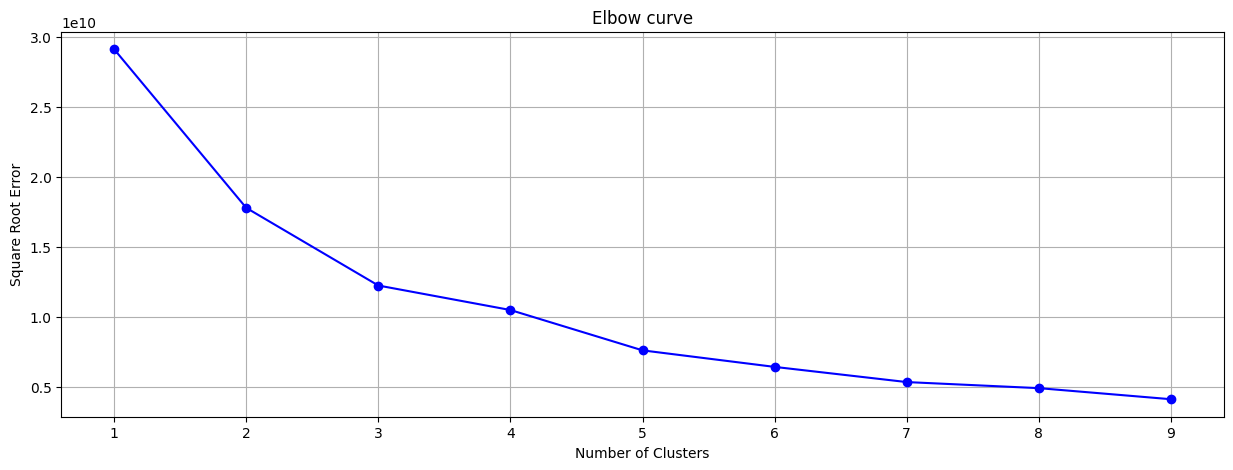

In [21]:
elbowmethod(df_subset)

# Kmeans clustering

In [25]:
# Using the graph shown in Elbow Method, find the appropriate value of K and set it here.
def analysis(vector, K=2):
    arr = (np.array(vector))

    # mean normalization of the data . converting into normal distribution having mean=0 , -0.1<x<0.1
    sc = StandardScaler()
    x = sc.fit_transform(arr)

    # Breaking into principle components
    pca = PCA(n_components=2)
    components = (pca.fit_transform(x))
    # Applying kmeans algorithm for finding centroids

    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit_transform(components)
    print("labels: ", kmeans.labels_)
    centers = kmeans.cluster_centers_

    # lables are assigned by the algorithm if 2 clusters then lables would be 0 or 1
    lables = kmeans.labels_
    colors = ["r.", "g.", "b.", "y.", "c."]
    colors = colors[:K + 1]

    for i in range(len(components)):
        plt.plot(components[i][0], components[i][1], colors[lables[i]], markersize=10)

    plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=150, linewidths=10, zorder=15)
    plt.xlabel("1st Principle Component")
    plt.ylabel("2nd Principle Component")
    title = "Styles Clusters"
    plt.title(title)
    plt.savefig("Results" + ".png")
    plt.show()

labels:  [3 3 3 3 0 3 0 3 0 0 3 1 1 1 1 0 1 1 1 3 1 2 1 1 1 1 3 1 1 3 1 1 1 1 1 3 1
 1 0 1 0 1 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 0 3
 0 0 0 3 3 3 0 0 0 0 0 0 3 3 3 0 0 3 3 3 0 3 3 3 3 3 3 0 3 3 0 3 3 0 1 1 0
 1 1 3 1 3 0 0 0 0 3 3 3 1 1 1 0 1 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 1 3 3 0 0 1 0 0 0 0 1 1 1 3 3 3 0 3 0 0 3 0 3 0 0 0 3 3 3 0 0 0 3 0 3 1 3
 0 0 3 3 3 1 1 3 3 3 2 1 1 1 1 0 0 0 0 3 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 3 3 0 0 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 3 3 3 0 0 3 3 3 0 3 3 3 0 3 0 3 3 3 3 3 3 0 0 3 0 0 0 0 3 0 0 3 3 3
 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 0 0 3 3 0 3 3 3 3 3 3 3 3
 3 3 3 0 0 1 1 3 0 0 0 0 1 3 0 0 3 3 3 3 0 3 3 3 1 3 3 0 0 0 3 0 0 3 0 0 0
 0 3 1 2 2 1 0 0 3 1 1 2 2 2 2 1 3 1 1 0 0 1 3 3 3 1 1 1 2 2 1 1 0 1 1 3 2
 2 1 3 1 0 1 2 2 2 1 2 2 3 1 2 2 2 1 1 0 1 2 2 2 2 1 0 2 2 2 2 3 3 2 3 3 2
 2 0 1 0 2 3 0 3 3 3 3 0 3 3 3 3 3 0 2 0 0 1 0 1 0 0 0 1 0 3 1 1 1 0 0 3 0
 0 1 1 3 3 1 0 0

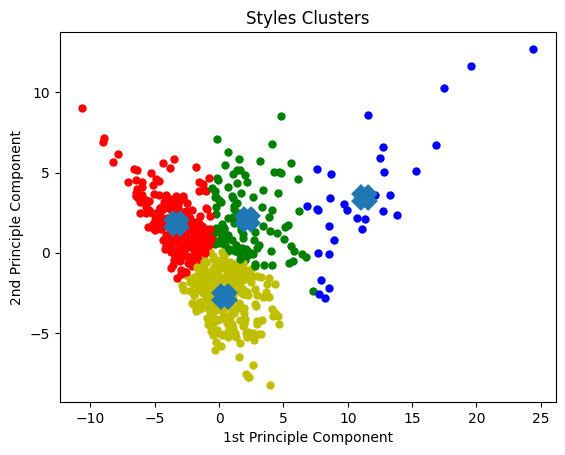

In [26]:
analysis(df_subset, 4)

labels:  [3 3 3 1 1 1 1 3 0 0 1 4 4 4 4 1 4 4 4 3 4 4 4 4 4 4 3 4 4 3 1 1 1 4 4 3 4
 4 0 1 1 4 0 0 0 0 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 0 3 3 1 3 1 0 1
 0 0 1 3 1 1 1 1 0 0 0 0 3 1 1 0 0 3 3 3 1 3 3 3 3 3 3 0 3 3 1 3 3 1 4 4 1
 1 1 3 0 1 0 1 0 0 3 3 3 1 1 4 0 1 3 1 4 1 1 1 1 3 3 3 3 1 3 3 3 3 3 3 3 3
 1 1 3 1 1 4 0 0 1 1 4 1 1 1 3 3 1 1 1 0 3 1 3 1 1 0 1 1 1 1 1 0 3 0 3 4 1
 0 0 1 3 3 1 4 1 3 3 4 4 0 4 0 1 0 1 0 3 1 1 0 0 4 0 0 4 0 4 0 4 0 1 0 0 0
 1 0 0 0 1 0 3 1 0 1 1 0 0 0 0 1 1 3 0 1 3 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0
 0 1 1 3 3 1 1 1 3 1 3 1 1 3 3 0 3 0 3 1 3 1 3 3 0 0 3 0 0 0 0 3 1 1 1 1 1
 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 1 1 0 1 1 3 3 3 3 1 0 3 1 1 3 3 3 1 3 3 3 3
 3 3 1 1 0 4 4 1 1 0 0 0 1 3 0 0 1 3 3 3 1 3 1 3 1 3 1 1 0 0 3 0 0 3 0 0 1
 1 1 1 2 4 4 1 0 1 4 4 4 4 2 2 4 3 4 4 0 0 4 3 3 3 4 4 4 2 2 4 4 0 0 4 3 4
 2 4 3 4 0 4 2 2 2 4 4 4 1 4 2 2 2 1 4 1 4 4 2 2 4 4 0 2 2 2 2 3 3 2 3 1 2
 2 0 4 1 4 3 1 3 3 1 1 1 3 3 3 3 3 0 4 0 0 4 0 4 1 0 0 4 0 3 4 4 4 1 0 1 0
 0 1 1 1 1 1 1 0

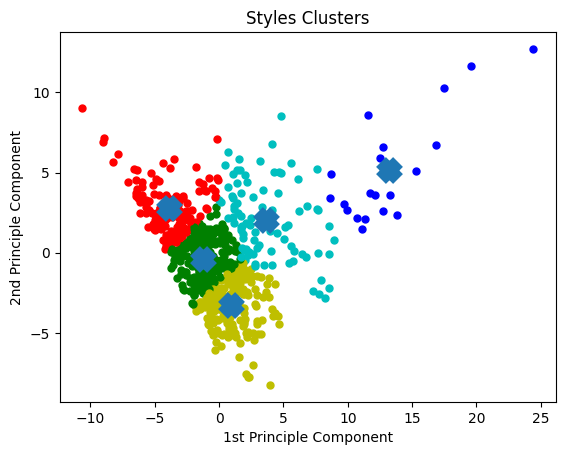

In [27]:
analysis(df_subset, 5)